<a href="https://colab.research.google.com/github/juliannaj123/Kodland/blob/main/animal_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving obraz_2024-08-26_181214369.png to obraz_2024-08-26_181214369.png


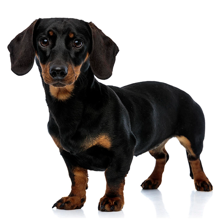

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1: Doberman (45.60%)
2: black-and-tan_coonhound (13.56%)
3: Rottweiler (2.72%)


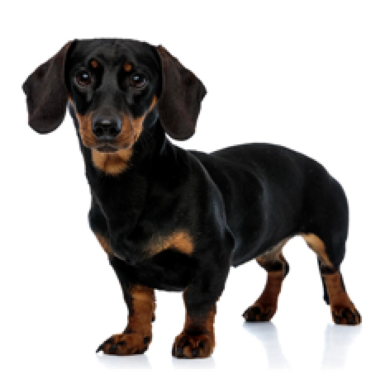

In [21]:
# Kod rozpoznaje rózne zwierzęta, rasy psów, rodzaje owadów itp. Miłej zabawy :)
import tensorflow as tf
import numpy as np
# Biblioteka rozpoznająca rodzaje owadów i roślin
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
# Biblioteka umożliwaijąca użytkownikowi przesłanie własnego pliku
from IPython.display import display
from PIL import Image
import io

# Załaduj model
model = MobileNetV2(weights='imagenet')

# Funkcja rozpoznająca dany obraz
def classify_plant_image(img):
    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)

    decoded_predictions = decode_predictions(predictions, top=3)[0]

    return decoded_predictions

# Funkcja do przesyłania plików
def upload_and_classify_image():
    #Stwórz przycisk wybierania pliku
    from google.colab import files
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Załaduj i wyświetl obraz
        img = Image.open(io.BytesIO(uploaded[filename]))
        img = img.resize((224, 224))
        display(img)

        # Klasyfikuj obraz
        predictions = classify_plant_image(img)

        # Wyświetl wyniki
        for i, (imagenet_id, label, score) in enumerate(predictions):
            print(f"{i + 1}: {label} ({score * 100:.2f}%)")

        # Wyświetl obraz
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Wywołaj funkcję
upload_and_classify_image()
